In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
import seaborn as sns
import math
import cv2
import warnings
warnings.filterwarnings('ignore')
import json
from PIL import Image

In [ ]:
from platform import python_version

print(python_version())

3.10.11


In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified')

In [ ]:
!ls

bounding_box.ipynb  Dataset  tb_classify.h5    VIT.ipynb  yolov5_Code.ipynb
data.csv	    images   test	       Yolo_data
data.gsheet	    TB_256   train_test.ipynb  yolov5


In [ ]:
master=pd.read_csv('data.csv')

In [ ]:
master.head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
0,h0001.png,512,512,train,none,no_tb,none,healthy
1,h0003.png,512,512,train,none,no_tb,none,healthy
2,h0005.png,512,512,train,none,no_tb,none,healthy
3,h0008.png,512,512,train,none,no_tb,none,healthy
4,h0009.png,512,512,train,none,no_tb,none,healthy


In [ ]:
master['image_type'].value_counts()

healthy           3800
sick_but_no_tb    3800
tb                1211
Name: image_type, dtype: int64

In [ ]:
len(master)

8811

In [ ]:
try:
  os.mkdir('Dataset')
except:
  pass

In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified/Dataset')

In [ ]:
try:
  os.mkdir('SICK')
except:
  pass

In [ ]:
try:
  os.mkdir('HEALTHY')
except:
  pass

In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified')

### Classification Data for healthy and Sick 

In [ ]:
for i,row in master.iterrows():
  if row['image_type']=='tb':
    continue
  elif row['image_type']=='healthy':
    img_path=os.path.join("images",row['fname'])
    im = cv2.imread(img_path)
    im=cv2.resize(im,(256,256))
    img=row['fname']
    cv2.imwrite(f'Dataset/HEALTHY/{img}',im)
    # print(im.shape)
  else:
    img_path=os.path.join("images",row['fname'])
    im = cv2.imread(img_path)
    im=cv2.resize(im,(256,256))
    img=row['fname']
    cv2.imwrite(f'Dataset/SICK/{img}',im)
    # print(im.shape)

In [ ]:
master[master['image_type']=='tb'].head()

In [ ]:
path='/content/drive/MyDrive/tbx11k-simplified/Dataset'

In [ ]:
TB=master[master['image_type']=='tb']

In [ ]:
TB.head()

,fname,image_height,image_width,source,bbox,target,tb_type,image_type
7600,tb0005.png,512,512,train,"{'xmin': 381.8337097167969, 'ymin': 126.873390...",tb,active_tb,tb
7601,tb0007.png,512,512,train,"{'xmin': 307.3073425292969, 'ymin': 62.0504455...",tb,latent_tb,tb
7602,tb0007.png,512,512,train,"{'xmin': 144.12008666992188, 'ymin': 52.934719...",tb,latent_tb,tb
7603,tb0012.png,512,512,train,"{'xmin': 307.4519348144531, 'ymin': 81.3111114...",tb,active_tb,tb
7604,tb0017.png,512,512,train,"{'xmin': 138.1031036376953, 'ymin': 119.276954...",tb,latent_tb,tb


In [ ]:
!pip install chitra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from chitra.image import Chitra


In [ ]:
import ast

In [ ]:
!ls

bounding_box.ipynb  Dataset	    train_test.ipynb  yolov5_Code.ipynb
data.csv	    images	    VIT.ipynb
data.gsheet	    tb_classify.h5  Yolo_data


In [ ]:
os.chdir('/content/drive/MyDrive/tbx11k-simplified')

In [ ]:
try:
  os.mkdir('TB_256')
except:
  pass

381.8337097167969 126.8733901977539 40.236907958984375 44.565773010253906
val: 190.91685 63.436695 211.03531 85.71958
bbox: 190.91685 63.436695 20.118454 22.282887


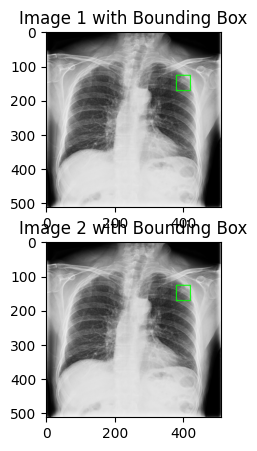

In [ ]:
for i,row in TB.iterrows():
  img_path=os.path.join("images",row['fname'])
  im = cv2.imread(img_path)
  bbx=row['bbox']
  input_dict = eval(bbx)
  # print(input_dict)
  x,y,w,h=input_dict['xmin'],input_dict['ymin'],input_dict['width'],input_dict['height']
  print(x,y,w,h)
  plt.subplot(2, 1, 1)
  cv2.rectangle(im, (int(x), int(y)), (int(x+w), int(y+h)), (0, 255, 0), 2)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.title('Image 1 with Bounding Box')

  new_img=Chitra(im,[x, y,x+w,y+h],'')
  new_img.resize_image_with_bbox((256,256))

  # print(new_img.shape)
  bbox=new_img.bboxes
  # print(bbox[0])
  x1,y1=bbox[0][0]
  x2,y2=bbox[0][1]
  w=x2-x1
  h=y2-y1
  plt.subplot(2, 1, 2)
  cv2.rectangle(np.asarray(new_img.image), (int(x1), int(y1)), (int(x1+w), int(y1+h)), (0, 255, 0), 2)
  plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
  plt.title('Image 2 with Bounding Box')
  # plt.xticks([]), plt.yticks([])

  print('val:',x1,y1,x2,y2)
  print('bbox:',x1,y1,w,h)
  Xmin = (x1+w/2)/256
  Ymin = (y1+h/2)/256
  W = w/256
  H = h/256
  lab=row['fname'].split('.')[0]
  img=row['fname']
  new_im=np.asarray(new_img.image)
  break

In [ ]:
for i,row in TB.iterrows():
  img_path=os.path.join("images",row['fname'])
  im = cv2.imread(img_path)
  bbx=row['bbox']
  input_dict = eval(bbx)
  x,y,w,h=input_dict['xmin'],input_dict['ymin'],input_dict['width'],input_dict['height']
  new_img=Chitra(im,[x, y,x+w,y+h],'')
  new_img.resize_image_with_bbox((256,256))
  bbox=new_img.bboxes
  x1,y1=bbox[0][0]
  x2,y2=bbox[0][1]
  w=x2-x1
  h=y2-y1
  Xmin = (x1+w/2)/256
  Ymin = (y1+h/2)/256
  W = w/256
  H = h/256
  lab=row['fname'].split('.')[0]
  img=row['fname']
  new_im=np.asarray(new_img.image)
  cv2.imwrite(f'TB_256/{img}',new_im)
  with open(f'TB_256/{lab}.txt', 'w') as f:
    f.write(str(0))
    f.write(' ')
    f.write(str(Xmin))
    f.write(' ')
    f.write(str(Ymin))
    f.write(' ')
    f.write(str(W))
    f.write(' ')
    f.write(str(H))
    f.close()

In [ ]:
len(os.listdir('/content/drive/MyDrive/tbx11k-simplified/TB_256'))

1598